In [42]:
import modules

from collections import Counter

import cellpylib as cpl
import numpy as np
import pandas as pd
import scipy.optimize as opt

import pickle
import sys

import random

# Packages for plotting
import matplotlib as mpl
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap
import ast

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  

import importlib


importlib.reload(modules)


<module 'modules' from '/Users/jennadevries/Documents/GitHub/CSS-Group1/modules.py'>

In [2]:
sys.setrecursionlimit(10000)

Critical density: 0.22040816326530616


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Total flow as a function of densities, p_slowdown = 0.3, v_max = 3')

Text(0.5, 0, 'Initial Density')

Text(0, 0.5, 'Total flow')

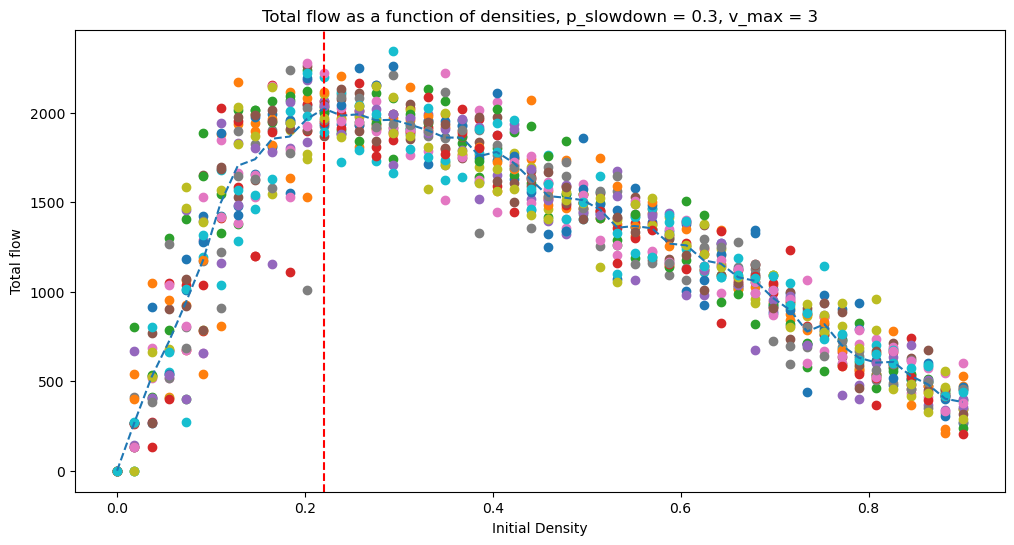

In [3]:
p = np.linspace(0.0, 0.9, 50)
L = 100
T = int(L / 2)
n = 20
p_slowdown = 0.3
v_max = 3

total_flows_per_density = dict()
average_flows_per_density = dict()

for density in p:
    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_flows = [modules.calculate_flow_nasch(evolution) for evolution in evolutions]
    average_flows = [flow / float(T) for flow in total_flows]
    
    total_flows_per_density[density] = total_flows
    average_flows_per_density[density] = average_flows

# Find critical point: the density for which the total flow average is maximum
mean_total_flow_per_density = {density: np.mean(flows) for density, flows in total_flows_per_density.items()}
critical_density = max(mean_total_flow_per_density, key=mean_total_flow_per_density.get)
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Total flow as a function of densities, p_slowdown = {p_slowdown}, v_max = {v_max}')
plt.plot(total_flows_per_density.keys(), total_flows_per_density.values(), 'o')
plt.plot(total_flows_per_density.keys(), [np.mean(flows) for flows in total_flows_per_density.values()], '--')

# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')

plt.xlabel('Initial Density')
plt.ylabel('Total flow')
plt.show()

Finding critical densities (Repetition 1 of 1): 100%|██████████| 150/150 [00:00<00:00, 180.77it/s]


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Critical density as a function of slowdown probability for v_max=1')

Text(0.5, 0, 'Slowdown probability')

Text(0, 0.5, 'Critical density')

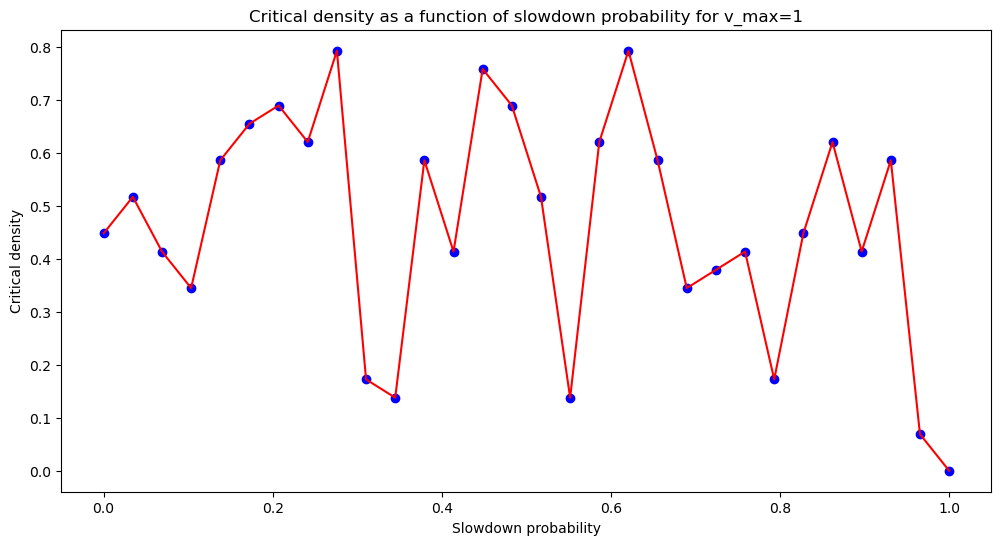

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Critical density as a function of slowdown probability for v_max=2')

Text(0.5, 0, 'Slowdown probability')

Text(0, 0.5, 'Critical density')

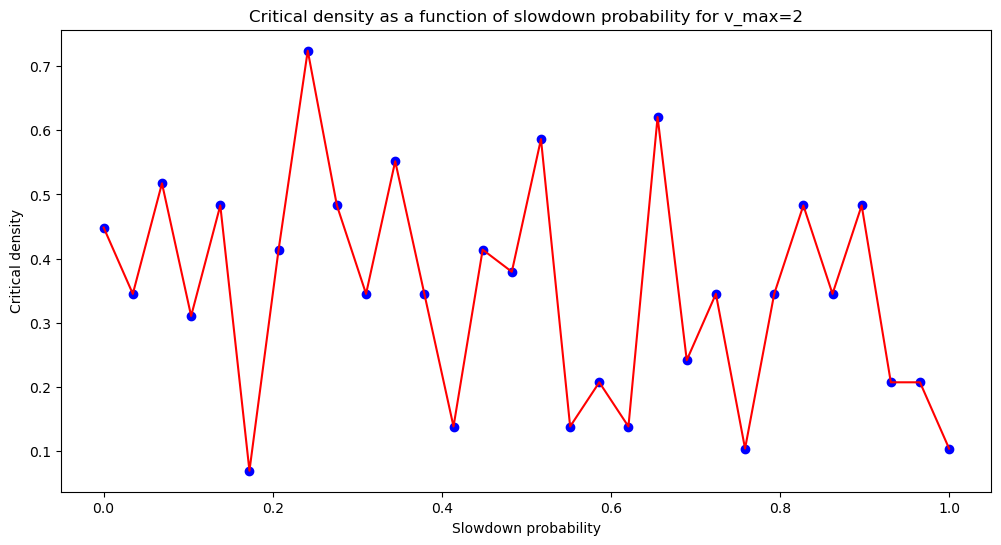

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Critical density as a function of slowdown probability for v_max=3')

Text(0.5, 0, 'Slowdown probability')

Text(0, 0.5, 'Critical density')

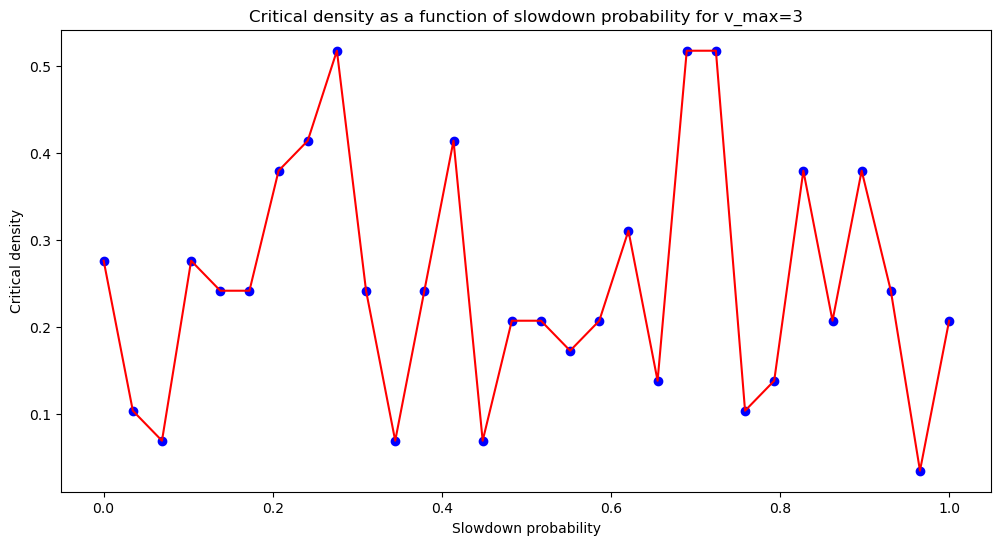

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Critical density as a function of slowdown probability for v_max=4')

Text(0.5, 0, 'Slowdown probability')

Text(0, 0.5, 'Critical density')

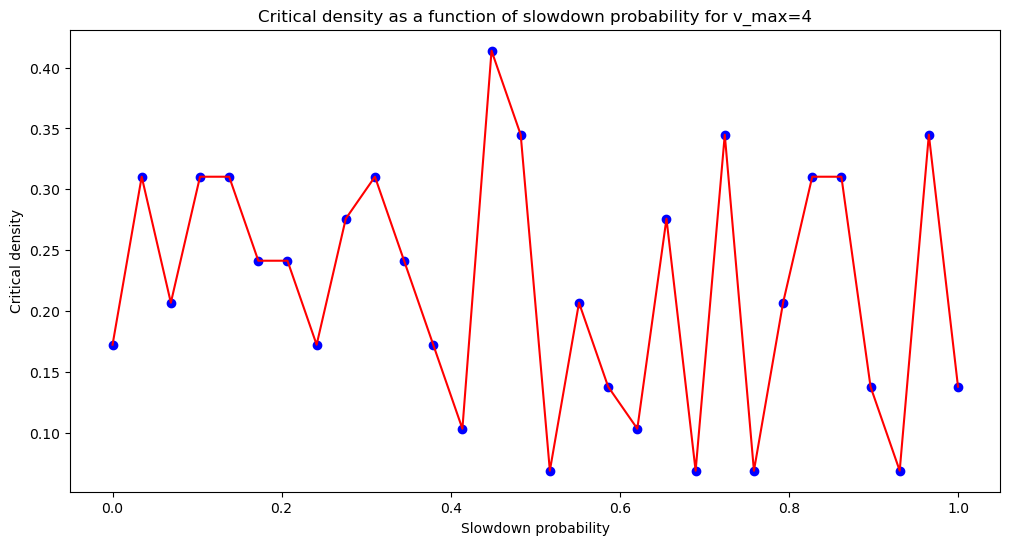

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Critical density as a function of slowdown probability for v_max=5')

Text(0.5, 0, 'Slowdown probability')

Text(0, 0.5, 'Critical density')

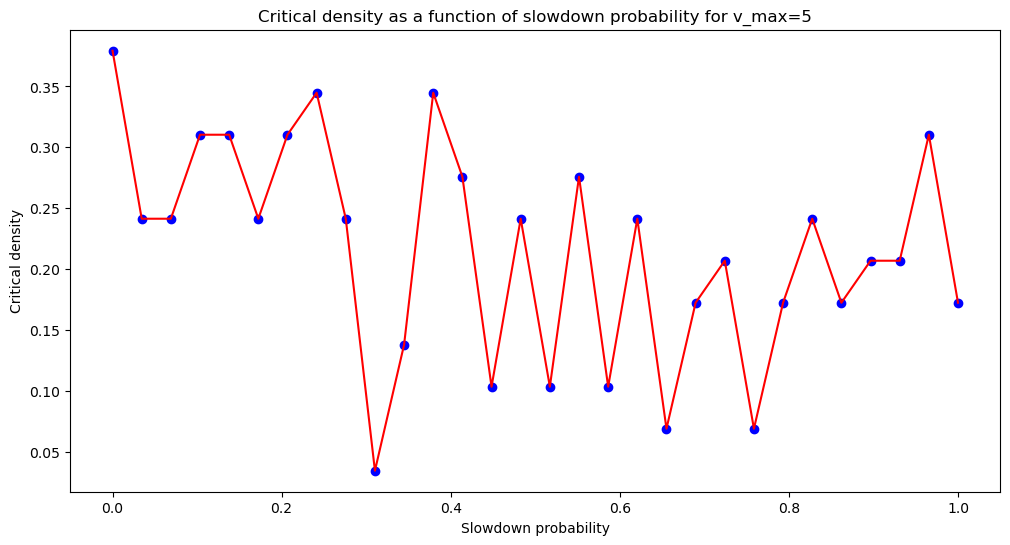

In [4]:
p_values = np.linspace(0.0, 1, 30)
L = 10
T = int(L / 2)
n = 1
p_slowdown_values = np.linspace(0.0, 1, 30)
v_max_values = [x for x in range(1, 6)]
repetitions = 1

output_df = modules.find_critical_dataframe_nasch(p_slowdown_values, v_max_values, p_values, L, T, n, repetitions=repetitions)

# Save the output to a csv file
output_df.to_csv(f'Results\\critical_densities_nasch_n={n}_L={L}_T={T}_#p={len(p_values)}_reps={repetitions}.csv', index=False)

# Plot the output per v_max
for v_max in v_max_values:
    df = output_df[output_df[f'v_max'] == v_max]
    x = list(df['p_slowdown'])
    y = list(df['critical_density']) # multiple values per x
    y_means = [np.mean(l) for l in y]
    plt.figure(figsize=(12,6))
    plt.title(f'Critical density as a function of slowdown probability for v_max={v_max}')
    plt.plot(x, y, 'o', color='blue')
    plt.plot(x, y_means, '-', color='red')
    plt.xlabel('Slowdown probability')
    plt.ylabel('Critical density')
    plt.show()

In [5]:
def density_evolution_nasch (evolution):
    """
    Function to calculate the density evolution of the NaSch model. The density is defined as the
    amount of cars in total. This is calculated by summing the total amount of cars.
    Input: 
    - evolution (list): List containing the evolution of the model for each timestep.
    Output:
    - density_evolution (list): List containing the density evolution of the model for each timestep.
    """
    location_evolution = [[x[0] for x in line] for line in evolution]
    density_evolution = [np.sum(line) / len(line) for line in location_evolution]
    return density_evolution


Flow: 22


Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'Evolution of the simple non-dynamic model \nρ = 0.4, p_slowdown = 0.1, v_max = 3')

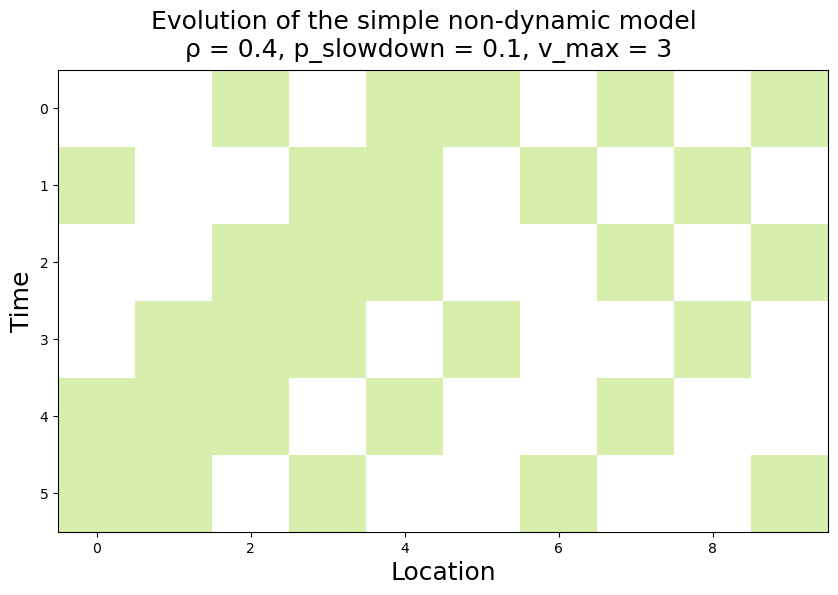

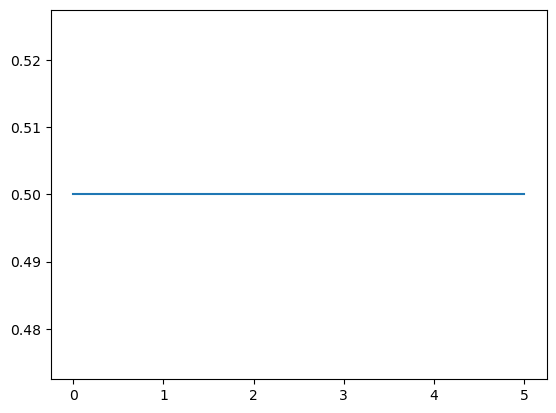

In [6]:
# Test non-dynamic model

initial_density = 0.4
L = 10
T = 5
n = 1

# NaSch parameters
p_slowdown = 0.1
v_max = 3

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(initial_density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=True, dynamic_model=False)

# Visualize the evolution
evolution = evolutions[0]

location_evolution = [[x[0] for x in line] for line in evolution]
speed_evolution = [[x[1] for x in line] for line in evolution]

flow = modules.calculate_flow_nasch(evolution)
print(f"Flow: {flow}")

# Create your own colormap from hexcode
colors = ["#ffffff", "#d8eeac"]

colormap = LinearSegmentedColormap.from_list("my_colormap", colors)

# plot the car evolution
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
fig.suptitle(f"Evolution of the simple non-dynamic model \nρ = {initial_density}, p_slowdown = {p_slowdown}, v_max = {v_max}", fontsize=18)
cpl.plot(location_evolution, colormap=colormap,
         xlabel='Location', ylabel='Time')

density_test = density_evolution_nasch(evolution)
plt.plot(density_test)



Text(0.5, 0, '')

Text(0, 0.5, '')

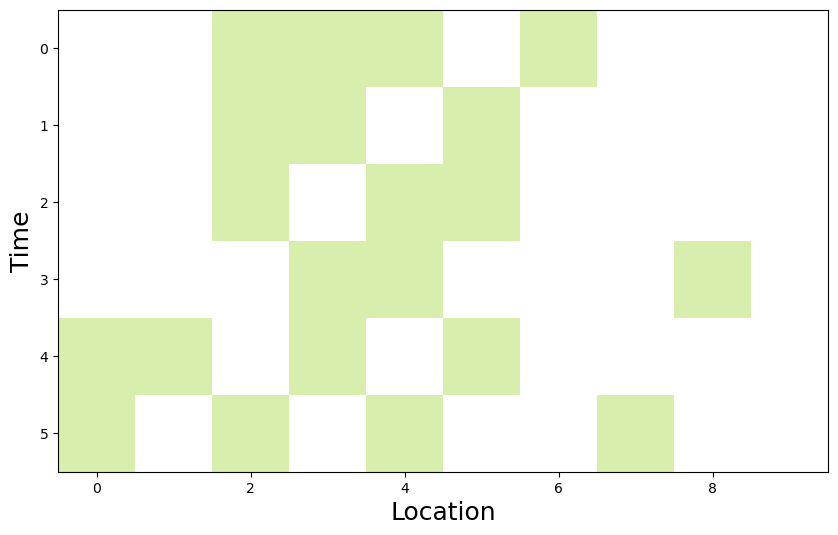

Flow: 18


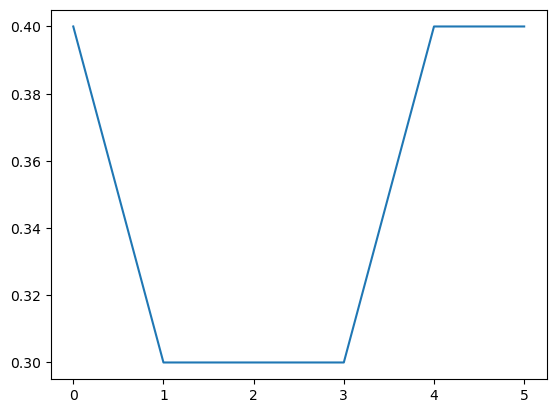

In [7]:
# Test dynamic model (with dynamics actually shown)
initial_density = 0.4
L = 10
T = 5
n = 1

# NaSch parameters
p_slowdown = 0.1
v_max = 3

# Dynamic parameters
neighbourhood_size = 3
entry_chance = 0.05
exit_chance = 0.05

while True:

    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(initial_density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                        return_evolutions=True, dynamic_model=True, neighbourhood_size=neighbourhood_size,
                                                                        entry_chance=entry_chance, exit_chance=exit_chance)

    # Visualize the evolution
    evolution = evolutions[0]

    location_evolution = [[x[0] for x in line] for line in evolution]
    speed_evolution = [[x[1] for x in line] for line in evolution]

    flow = modules.calculate_flow_nasch(evolution)


    density_test = density_evolution_nasch(evolution)

    # Check if density goes up and down, and first density = initial_density
    up = False
    down = False
    
    for i in range(1, len(density_test)):
        if density_test[i] > density_test[i-1]:
            up = True
        if density_test[i] < density_test[i-1]:
            down = True
    
    if up and down and density_test[0] == initial_density:
        break

# Create your own colormap from hexcode

colors = ["#ffffff", "#d8eeac"]

colormap = LinearSegmentedColormap.from_list("my_colormap", colors)

# plot the car evolution
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
ax.set_xlabel(ax.get_xlabel(), fontsize=18)
ax.set_ylabel(ax.get_ylabel(), fontsize=18)
# fig.suptitle(f"Evolution of dynamic model \ninitial ρ = {initial_density}, p_slowdown = {p_slowdown}, v_max = {v_max},\nentry_chance = {entry_chance}, exit_chance = {exit_chance}, neighbourhood_size = {neighbourhood_size}", 
            #  fontsize=18)
cpl.plot(location_evolution, colormap=colormap,
         xlabel='Location', ylabel='Time')

print(f"Flow: {flow}")
plt.plot(density_test)

Cluster Sizes: [4]
Cluster Lifespans: [2]


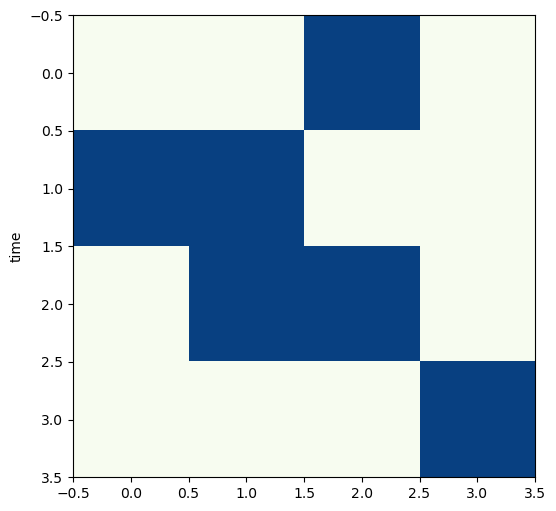

Cluster Sizes: [9, 2]
Cluster Lifespans: [5, 2]


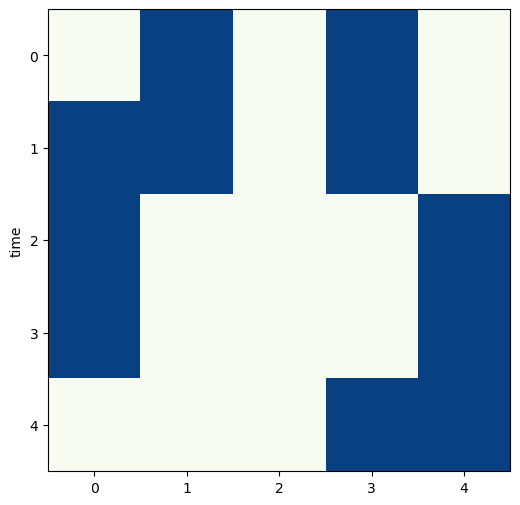

In [8]:
modules.test_new_jam_finder()

# Jam Size Distribution NaSch without dynamics

In [9]:
sys.setrecursionlimit(10000)

#Critical densities (5) from data file for p_slowdown and vmax fixed 
#0.4482758620689655,3,"[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2413793103448276, 0.22068965517241382, 0.2, 0.2]

p = 0.22068965517241382
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.4482758620689655
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01
dynamic_model=False
return_evolutions=True

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)




#To save data in file for plot
#file = open('Results/loglog_jam_nondynamic_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()

## Visualize Jam Size distribution in log log plot and check for powerlaw (no dynamics)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.9312769406656582


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, '$\\rho$=0.22068965517241382, v_max=3, p_slowdown=0.4482758620689655,$\\tau$=1.9312769406656582 ')

Text(0.5, 0, 'Jam size')

Text(0, 0.5, 'Frequency')

Text(0.5, 0.98, 'Jam size distribution for L=300 in non dynamical model')

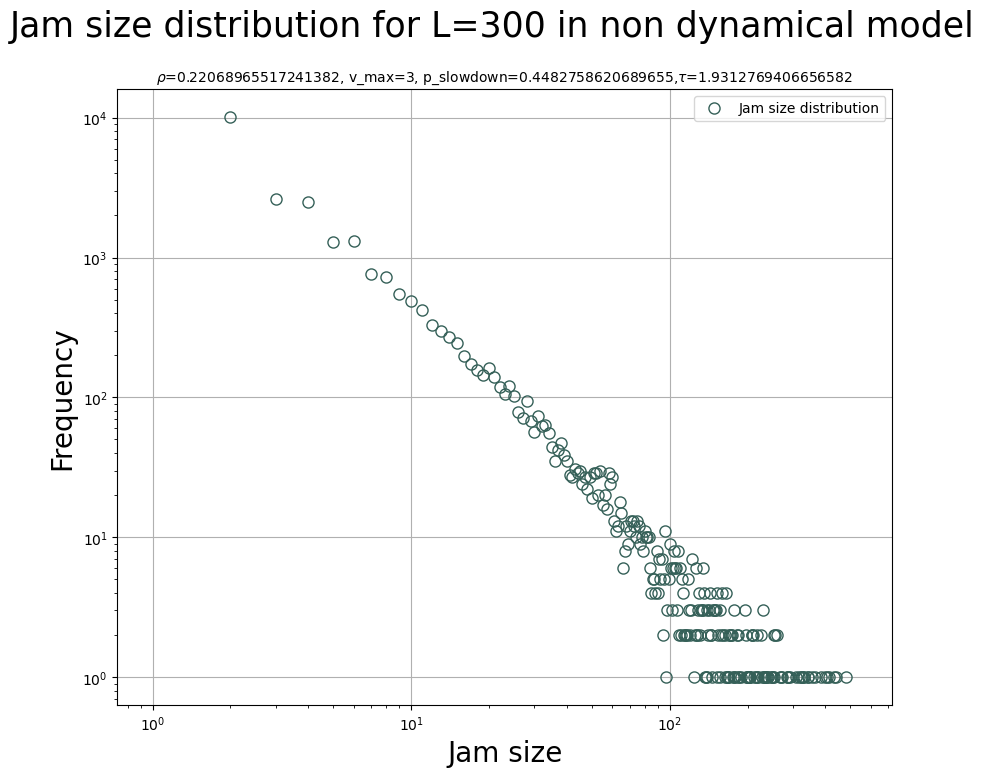

In [10]:
file = open('Results/loglog_jam_nondynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)
 

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)

plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={exponent} ', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in non dynamical model', fontsize=25)
plt.show()

# Jam Size Distribution NaSch With Dynamics 

In [11]:
p = 0.2
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.4
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

dynamic_model = True
return_evolutions=True

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


#To save data in file for plot
#file = open('Results/loglog_jam_dynamic_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()

## Visualize Jam Size distribution in log log plot and check for powerlaw (dynamics)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.0000)
1.760266533033647


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, '$\\rho$=0.2, v_max=3, p_slowdown=0.4,$\\tau$=1.76')

Text(0.5, 0, 'Jam size')

Text(0, 0.5, 'Frequency')

Text(0.5, 0.98, 'Jam size distributions for L=300 in dynamical model')

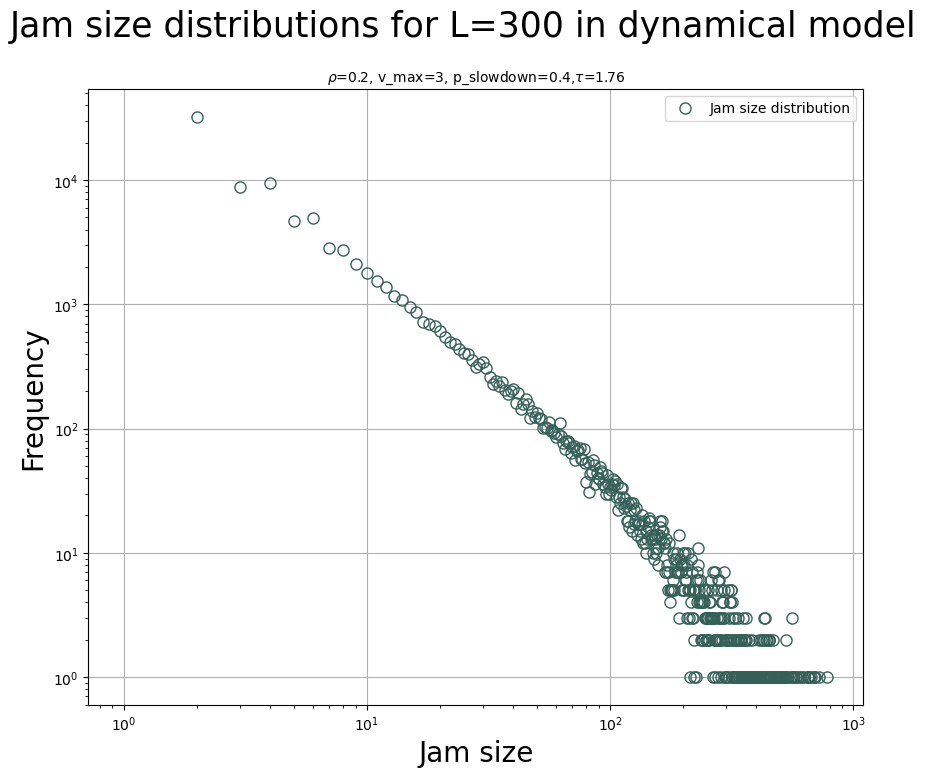

In [12]:
file = open('Results/loglog_jam_dynamic_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)
plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={round(exponent,2)}', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.suptitle(f'Jam size distributions for L={L} in dynamical model', fontsize=25)
plt.show()

# Jam Size Distribution CA (p_slowdown=0, vmax=1)


In [13]:
sys.setrecursionlimit(10000)

p = 0.22068965517241382
L = 300
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0 
v_max = 1 

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

dynamic_model=False

return_evolutions=True

lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown, 
                                                                      return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                      entry_chance=entry_chance, exit_chance=exit_chance)


#To save data in file for plot
#file = open('Results/loglog_jam_CA_critical.txt', 'wb')
#pickle.dump(jam_size_counter, file)
#file.close()


## Visualize Jam Size distribution in log log plot and check for powerlaw (CA)

Calculating best minimal value for power law fit
Data prefers power_law over exponential (p-value: 0.9854)
4.216223386113601


<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, '$\\rho$=0.22068965517241382, v_max=1, p_slowdown=0,$\\tau$=4.216223386113601 ')

Text(0.5, 0, 'Jam size')

Text(0, 0.5, 'Frequency')

Text(0.5, 0.98, 'Jam size distribution for L=300 in CA 184')

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 [Text(0.01, 0, '$\\mathdefault{10^{-2}}$'),
  Text(0.1, 0, '$\\mathdefault{10^{-1}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$'),
  Text(10.0, 0, '$\\mathdefault{10^{1}}$'),
  Text(100.0, 0, '$\\mathdefault{10^{2}}$'),
  Text(1000.0, 0, '$\\mathdefault{10^{3}}$')])

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 [Text(0, 0.01, '$\\mathdefault{10^{-2}}$'),
  Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$'),
  Text(0, 100.0, '$\\mathdefault{10^{2}}$'),
  Text(0, 1000.0, '$\\mathdefault{10^{3}}$'),
  Text(0, 10000.0, '$\\mathdefault{10^{4}}$')])

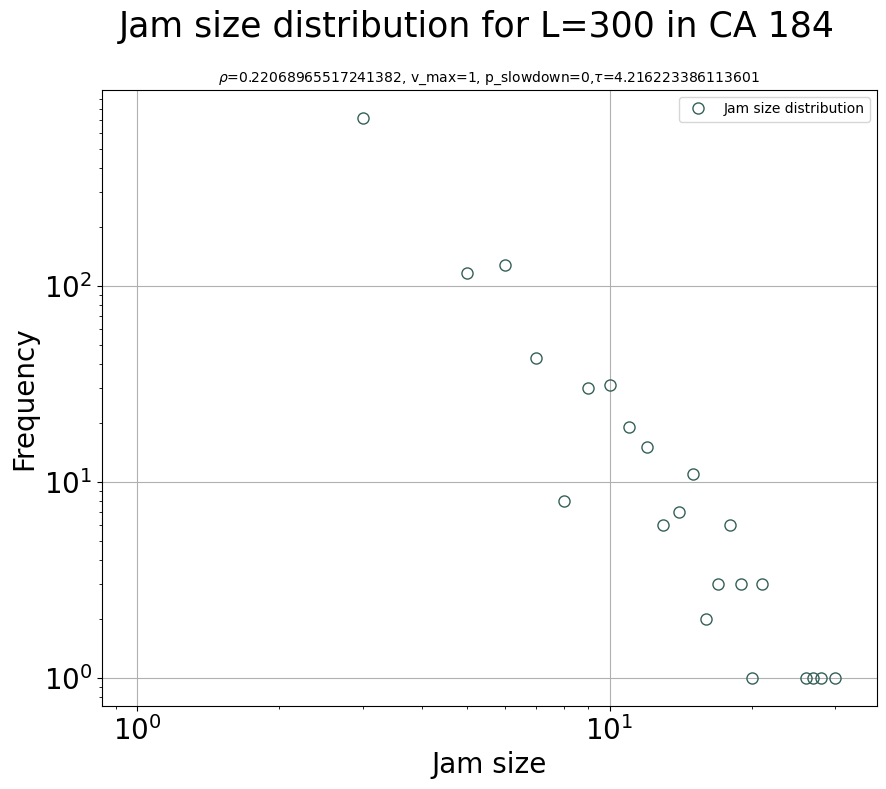

In [14]:
file = open('Results/loglog_jam_CA_critical.txt', 'rb')
jam_size_counter = pickle.load(file)

#check for powerlaw and make loglog plot for visualisation
result, exponent = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
print(result) #print result of power law test
print(exponent)

plt.figure(figsize=(10,8))
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o', markerfacecolor='none', markeredgecolor='#356058', markersize=8)

#line to plot the critical exponent line in the plot 
#plt.loglog(range(1, int(max(jam_size_counter.keys()))), power(range(1, int(max(jam_size_counter.keys()))), exponent), '--')
plt.legend(['Jam size distribution'])
plt.grid()
plt.title(f'$\\rho$={p}, v_max={v_max}, p_slowdown={p_slowdown},$\\tau$={exponent} ', fontsize=10)
plt.xlabel('Jam size', fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.suptitle(f'Jam size distribution for L={L} in CA 184', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# Analyze powerlaw of the dynamic exponent of the NaSch traffic flow

In [15]:

L = 100
T = int(L/2)
n = 1

# NaSch parameters
p_slowdown = 0.3157894736842105
v_max = 3

# Dynamic parameters
neighbourhood_size = 10
entry_chance = 0.1
exit_chance = 0.1
dynamic_model=True
return_evolutions=True

p_value = np.linspace(0.1, 0.9, 9)

for p in p_value: 
    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(p, L, T, n, v_max=v_max, p_slowdown = p_slowdown,return_evolutions=return_evolutions, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size,
                                                                        entry_chance=entry_chance, exit_chance=exit_chance)

    result_jam_test = modules.analyze_powerlaw_distribution(list(jam_size_counter.elements()))
    
    print ("for initial density:", p) 
    print(result_jam_test) #print result of power law test
    

Calculating best minimal value for power law fit
for initial density: 0.1
('Data prefers power_law over exponential (p-value: 0.0000)', 1.7646027516727425)
Calculating best minimal value for power law fit
for initial density: 0.2
('Data prefers power_law over exponential (p-value: 0.0027)', 1.972222274892865)
Calculating best minimal value for power law fit
for initial density: 0.30000000000000004
('Data prefers power_law over exponential (p-value: 0.0015)', 1.693806419552062)
Calculating best minimal value for power law fit
for initial density: 0.4
('Data prefers power_law over exponential (p-value: 0.2912)', 1.9967447511310437)
Calculating best minimal value for power law fit
for initial density: 0.5
('Data prefers power_law over exponential (p-value: 0.0013)', 1.9923118795483008)
Calculating best minimal value for power law fit
for initial density: 0.6
('Data prefers power_law over exponential (p-value: 0.0954)', 1.7625676976694713)
Calculating best minimal value for power law fit
f

# Relationship between critical exponent and initial density for dynamical model

In [16]:

sys.setrecursionlimit(50000)

# A power-law distribution for a given initial density
def analyze_critical_exponent_for_density(p, L, T, n_repetitions, v_max, p_slowdown, triangular, dynamic_model, neighbourhood_size, entry_chance, exit_chance):
    """Function that saves the critical exponent for a initial density."""

    # Nasch model
    lifespan_counter, jam_counter = modules.run_model_stochastic(p, L, T, n_repetitions, v_max, p_slowdown, triangular, return_evolutions=False, dynamic_model=dynamic_model, neighbourhood_size=neighbourhood_size, entry_chance=entry_chance, exit_chance=exit_chance)
    
    # Previous defined analyze_powerlaw_distribution function 
    result, exponent = modules.analyze_powerlaw_distribution(list(jam_counter.elements()))
    
    return p, exponent

# Parameters
L = 100
T = int(L/2)
n_repetitions = 1
v_max = 3
p_slowdown = 0.8
triangular = False
dynamic_model = True
neighbourhood_size = 10
entry_chance = 0.01
exit_chance = 0.01

# Initial Densities 
initial_densities = np.linspace(0.1, 0.85, 100)

# Collect Results
results = [analyze_critical_exponent_for_density(p, L, T, n_repetitions, v_max, p_slowdown, triangular, dynamic_model, neighbourhood_size, entry_chance, exit_chance) for p in initial_densities]

# Unpack Results
densities, exponents = zip(*results)

#save plot
#file = open('Results/densities_density_dynamic_pslow08.txt', 'wb')
#pickle.dump(results, file)
#file.close()

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best min

# pslowdown = 0.8

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Initial Density ($\\rho$)')

Text(0, 0.5, 'Critical Exponent ($\\tau$)')

Text(0.5, 1.0, 'vmax=3, p_slowdown=0.8')

Text(0.5, 0.98, 'Critical Exponent vs. Initial Density for L=100 in dynamical model')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 [Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5'),
  Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 5.5, '5.5')])

(1.5, 2.0)

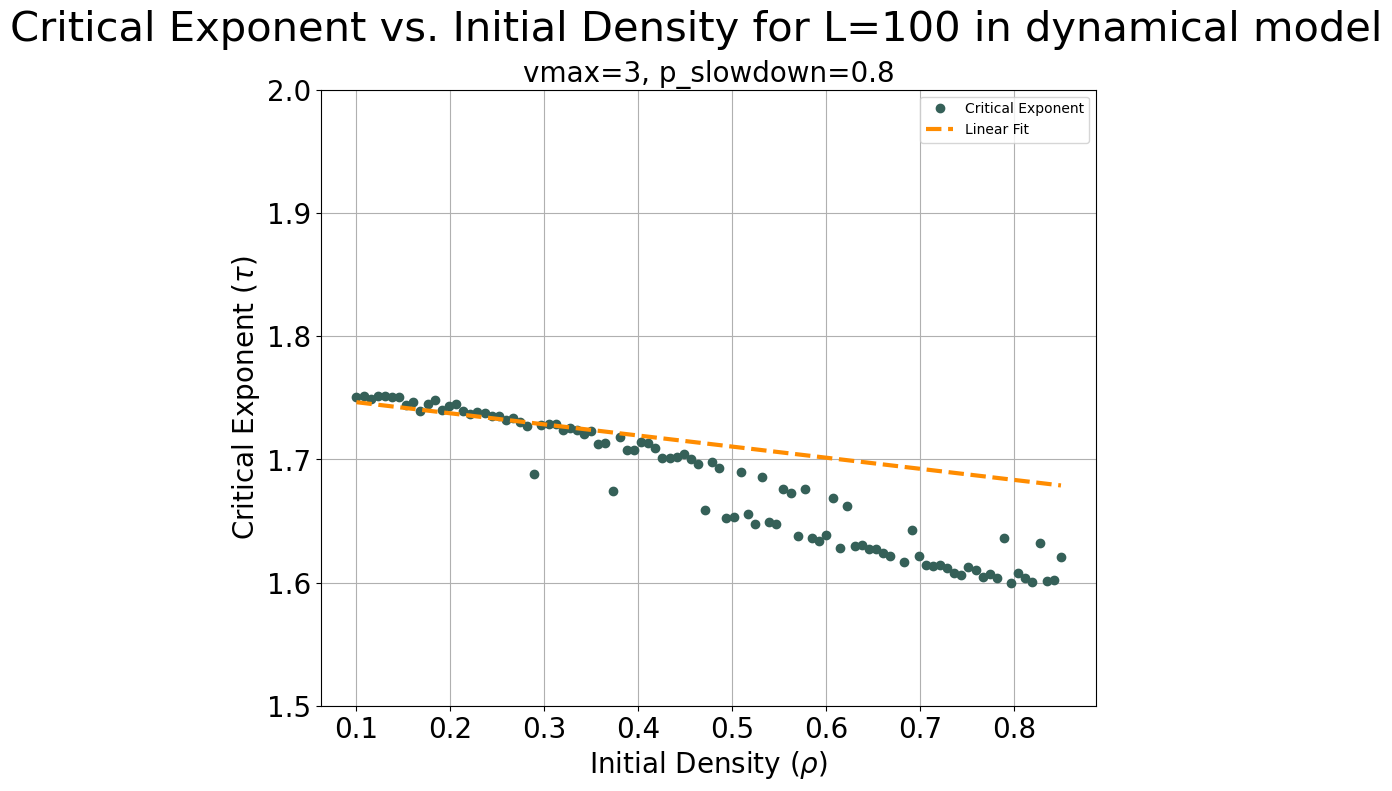

In [17]:
# Visualize Results
file = open('Results/densities_density_dynamic_pslow08.txt', 'rb')
results = pickle.load(file)

# Unpack Results
densities, exponents = zip(*results)

# Perform linear regression
fit_params = np.polyfit(densities, exponents, 1)
fit_line = np.polyval(fit_params, densities)

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(densities, exponents, 'o', color='#356058',linewidth=3,label='Critical Exponent')
plt.plot(densities, fit_line, '--', color='darkorange', linewidth=3, label='Linear Fit')
plt.xlabel('Initial Density ($\\rho$)', fontsize=20)
plt.ylabel('Critical Exponent ($\\tau$)', fontsize=20)
plt.title(f'vmax={v_max}, p_slowdown={p_slowdown}', fontsize=20)
plt.suptitle(f'Critical Exponent vs. Initial Density for L={L} in dynamical model', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(1.5,2)
plt.legend()
plt.show()


# pslowdown = 0.2

<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Initial Density ($\\rho$)')

Text(0, 0.5, 'Critical Exponent ($\\tau$)')

Text(0.5, 1.0, 'vmax=3, p_slowdown=0.2')

Text(0.5, 0.98, 'Critical Exponent vs. Initial Density for L=100 in dynamical model')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.2, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

(0.0, 5.0)

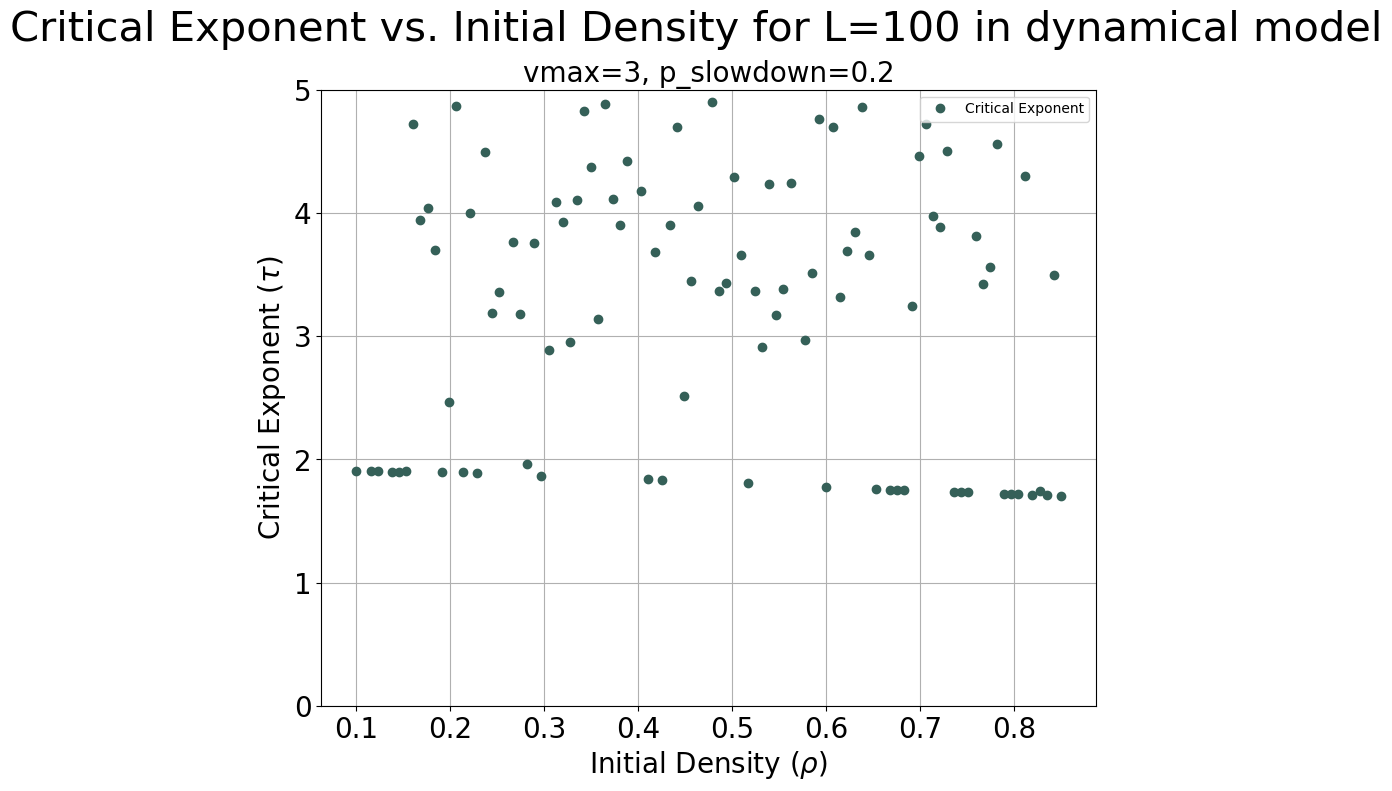

In [18]:
# Visualize Results
file = open('Results/densities_density_dynamic_pslow02.txt', 'rb')
results = pickle.load(file)

# Unpack Results
densities, exponents = zip(*results)

plt.figure(figsize=(10,8))
plt.grid()
plt.plot(densities, exponents, 'o', color='#356058',linewidth=3,label='Critical Exponent')
plt.xlabel('Initial Density ($\\rho$)', fontsize=20)
plt.ylabel('Critical Exponent ($\\tau$)', fontsize=20)
plt.title(f'vmax={3}, p_slowdown={0.2}', fontsize=20)
plt.suptitle(f'Critical Exponent vs. Initial Density for L={L} in dynamical model', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylim(0,5)
plt.legend()
plt.show()

# CRITICAL DENSITY PLOT

Text(0.5, 0, 'P(slow down)')

Text(0.5, 0.5, '$v_{max}$')

Text(0.5, 0, '$\\rho_{critical}$')

Text(0.5, 0.92, '            $\\rho_{critical}$ for different values for $v_{max}$ and P(slow down)')

Text(0.5, 1.0, '$\\bar{\\rho}$')

/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/4115910401.py:42: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


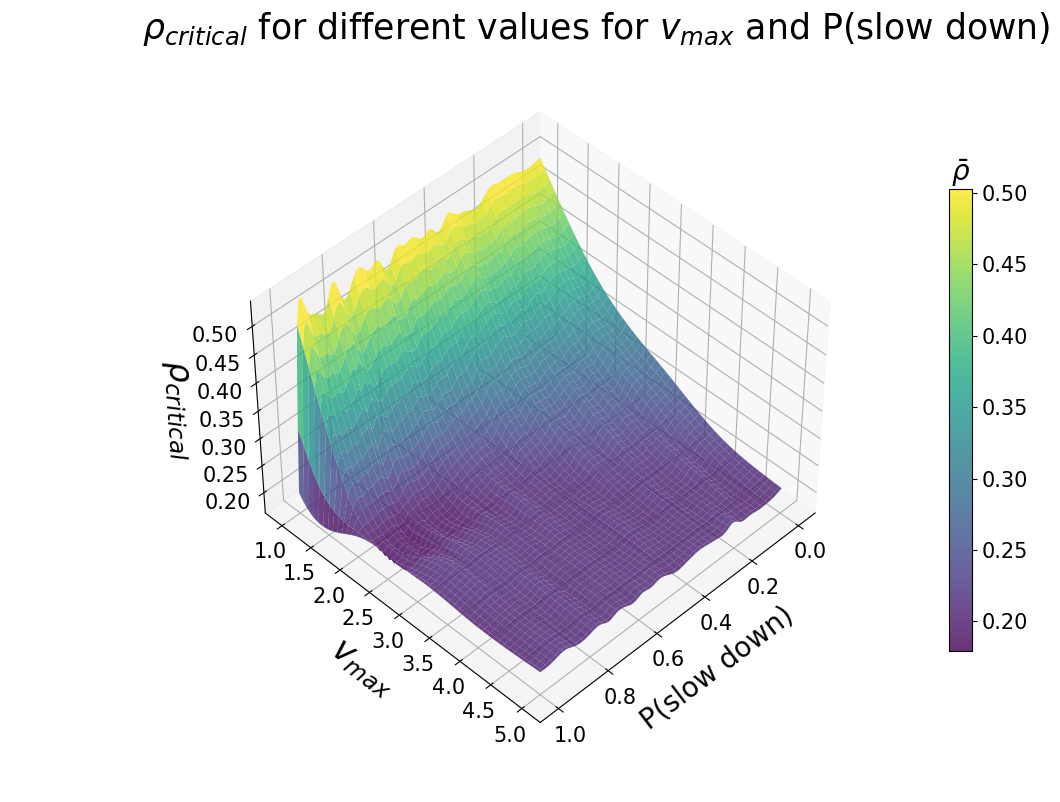

In [19]:
filepath = 'Results/critical_densities_nasch_n=10_L=200_T=100_#p=30_reps=10.csv'
df = pd.read_csv(filepath)

# Load in values
x_values = df['p_slowdown'].values
y_values = df['v_max'].values
z_values = [np.mean(ast.literal_eval(string)) for string in df['critical_density'].values]


# Create grid to later put Z values on
xi, yi = np.linspace(min(x_values), max(x_values), 100), np.linspace(min(y_values), max(y_values), 100)

# Put actual datapoints on grid
X, Y = np.meshgrid(xi, yi)

# Put z_value data on the grid and interpolate 
Z = griddata((x_values, y_values), z_values, (X, Y), method='cubic')

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Set labels, title and ticks
ax.set_xlabel(r'P(slow down)', labelpad=15, fontsize=20)
ax.set_ylabel(r'$v_{max}$', labelpad=15, fontsize=24)
ax.set_zlabel(r'$\rho_{critical}$', labelpad=18, fontsize=24)

ax.tick_params(axis='x', which='both', labelsize=15)
ax.tick_params(axis='y', which='both', labelsize=15)
ax.tick_params(axis='z', which='both', labelsize=15, pad=10)

plt.title(r'            $\rho_{critical}$ for different values for $v_{max}$ and P(slow down)', fontsize=25)

# Add colorbar
bar = fig.colorbar(surf, ax=ax, shrink=0.5)
bar.ax.set_title(r'$\bar{\rho}$', fontsize=20)
bar.ax.tick_params(axis='y', which='both', labelsize=15)


# Set view
ax.view_init(elev=45, azim=45) 
ax.dist = 12
plt.savefig('Plots_presentation/critical_density_3D.png')

# MOVEMENT TOWARDS CRTIICAL DENSITY

In [21]:
L = 30
n = 10
v_max = 5
p_slowdown = 0.3
neighbourhood_size = 10
entry_chance = 0.1
exit_chance = 0.1
dynamic_model=True

densities_dynamic = []
for p_idx, p in enumerate(np.linspace(0.3, 0.9, 120)):
    density_dynamic = modules.find_density(L, p, n, v_max, p_slowdown, dynamic_model, neighbourhood_size, entry_chance, exit_chance)
    densities_dynamic.append(density_dynamic)

# file = open('Results/densities_dynamic.txt', 'wb')
# pickle.dump(densities_dynamic, file)
# file.close()

<Figure size 1000x1200 with 0 Axes>

(0.0, 30.0)

(0.3, 0.9)

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Density')

([<matplotlib.axis.YTick at 0x14ac310f0>,
 [Text(0, 0.3, '$0.3$'),
  Text(0, 0.9, '$0.9$'),
  Text(0, 0.501249907715024, '$\\bar{\\rho}$')])

(array([ 0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

Text(0.5, 1.0, 'Evolution of $\\rho$ of cars over time')

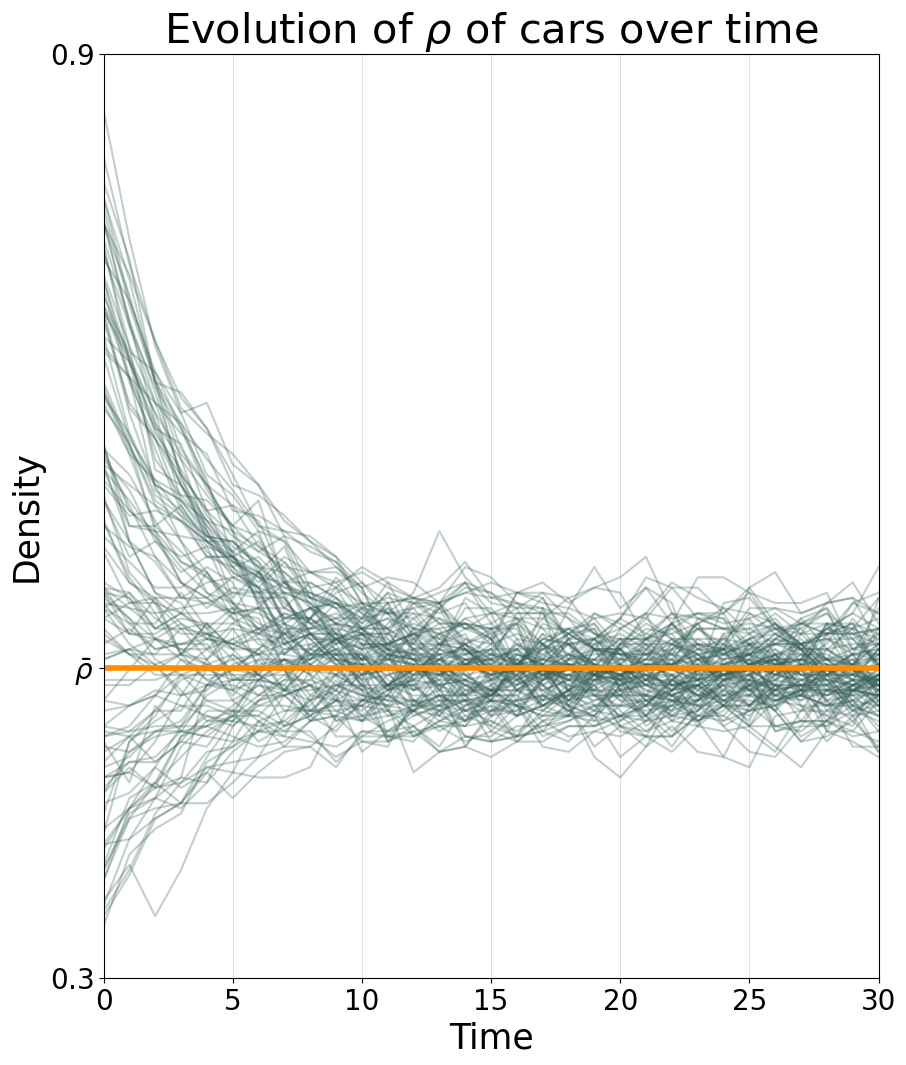

In [22]:
file = open('Results/densities_dynamic.txt', 'rb')
densities_dynamic = pickle.load(file)

plt.figure(figsize=(10,12))

for density in densities_dynamic:
    plt.plot(density, '#356058', alpha=0.3)


plt.plot([-100, 300], [np.mean(densities_dynamic), np.mean(densities_dynamic)], color='darkorange', linewidth=4)
plt.xlim(0,30)
plt.ylim(0.3,0.9)
plt.grid(alpha=0.4)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.yticks([0.3, 0.9, np.mean(densities_dynamic)], [r'$0.3$', r'$0.9$', r'$\bar{\rho}$'], fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'Evolution of $\rho$ of cars over time', fontsize=30)

# DENSITY VERSUS EXIT AND ENTRY CHANCE

In [24]:
L = 30
n = 10
v_max = 5
p_slowdown = 0.3
neighbourhood_size = 10
entry_chance = 0.1
dynamic_model=True

final_density_dict = {}

for ratio_idx, ratio in enumerate(np.linspace(0.1, 4, 40)):
    final_density_column = []  # List to store values for the current ratio
    for p_idx, p in enumerate(np.linspace(0.3, 0.9, 30)):
        exit_chance = ratio * entry_chance
        densities = modules.find_density(L, p, n, v_max, p_slowdown, dynamic_model, neighbourhood_size, entry_chance, exit_chance)
        density_mean = np.mean(densities[L:])
        final_density_column.append(density_mean)

    # Store the entire list of values for the current ratio
    final_density_dict[ratio] = final_density_column

# file = open('Results/final_density_dict.txt', 'wb')
# pickle.dump(final_density_dict, file)
# file.close()


<Figure size 1000x1200 with 0 Axes>

(0.1, 4.0)

(0.2, 0.9)

Text(0.5, 0, '$\\frac{P(exit)}{P(entry)}$')

Text(0, 0.5, '$\\bar{\\rho}$')

(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.7, '0.7'),
  Text(0, 0.8, '0.8'),
  Text(0, 0.9000000000000001, '0.9')])

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0')])

Text(0.5, 1.0, '$\\bar{\\rho}$ for different ratios of $P(exit)$ and $P(entry)$')

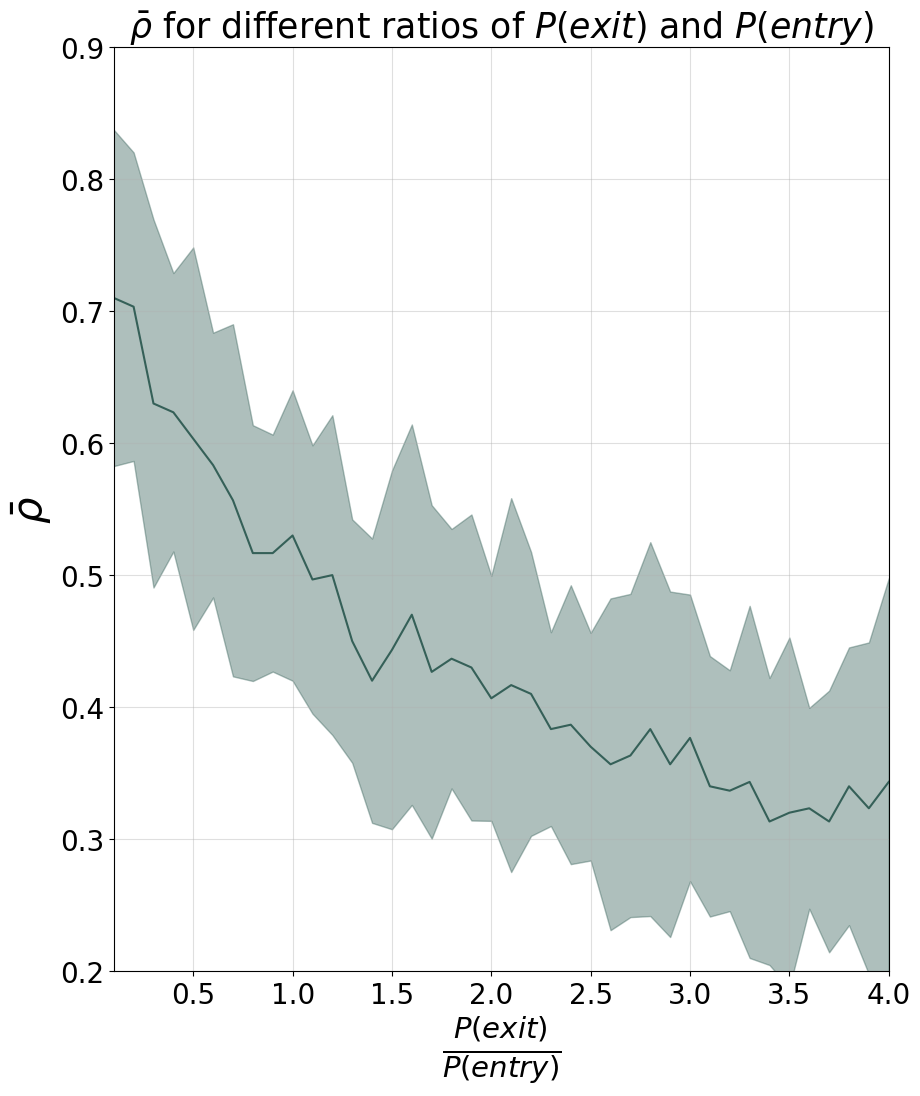

In [25]:
file = open('Results/final_density_dict.txt', 'rb')
final_density_dict = pickle.load(file)

ratios = np.linspace(0.1, 4, 40)

means = [np.mean(final_density_dict[ratio]) for ratio in ratios]
std_devs = [np.std(final_density_dict[ratio]) for ratio in ratios]

plt.figure(figsize=(10,12))

plt.plot(ratios, means, label='Final Density', color='#356058')
plt.fill_between(ratios, np.subtract(means, std_devs), np.add(means, std_devs), alpha=0.4, color='#356058')

plt.xlim(0.1,4)
plt.ylim(0.2,0.9)
plt.grid(alpha=0.4)
plt.xlabel(r'$\frac{P(exit)}{P(entry)}$', fontsize=30)
plt.ylabel(r'$\bar{\rho}$', fontsize=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.title(r'$\bar{\rho}$ for different ratios of $P(exit)$ and $P(entry)$', fontsize=25)

plt.show()

##  Total Delay and Average Delay 

In [26]:
sys.setrecursionlimit(5000000) 

Critical density: 0.2612244897959184


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Total flow as a function of densities')

Text(0.5, 0, 'Density')

Text(0, 0.5, 'Total flow')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.20000000000000004, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5000000000000001, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000'),
  Text(0, 3500.0, '3500')])

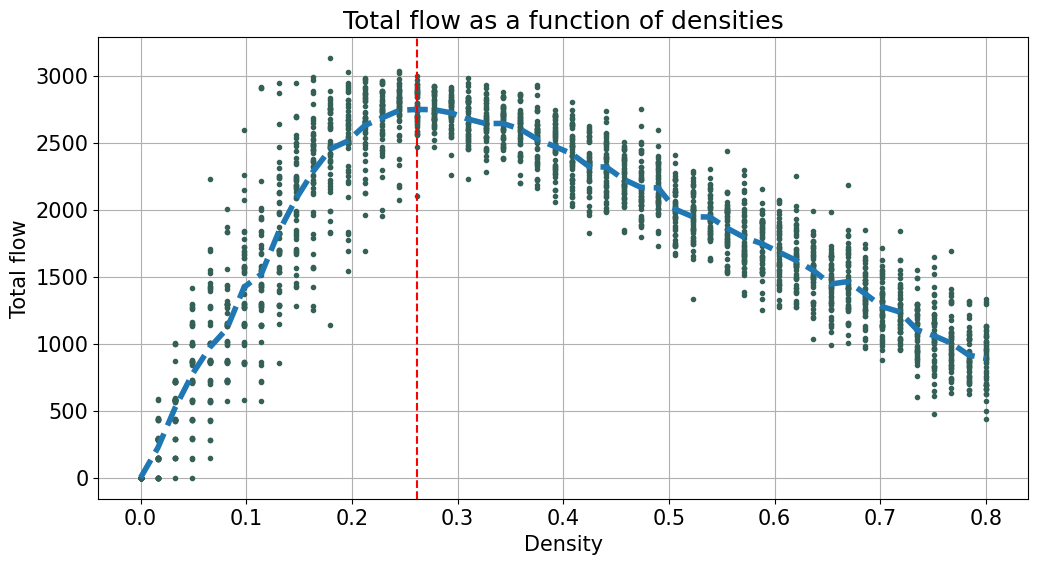

In [31]:
sys.setrecursionlimit(5000000)
p = np.linspace(0, 0.8, 50)   
L = 100  
T = int(L / 2)
n = 50
p_slowdown = 0.1  
v_max = 3

total_flows_per_density = dict()
average_flows_per_density = dict()

for density in p:
    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_flows = [modules.calculate_flow_nasch(evolution) for evolution in evolutions]
    average_flows = [flow / float(T) for flow in total_flows]
    
    total_flows_per_density[density] = total_flows
    average_flows_per_density[density] = average_flows

# Find critical point: the density for which the total flow average is maximum
mean_total_flow_per_density = {density: np.mean(flows) for density, flows in total_flows_per_density.items()}
critical_density = max(mean_total_flow_per_density, key=mean_total_flow_per_density.get)
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Total flow as a function of densities',fontsize=18)
plt.plot(total_flows_per_density.keys(), total_flows_per_density.values(), 'o',markerfacecolor='#356058', markeredgecolor='#356058',markersize=3)
plt.plot(total_flows_per_density.keys(), [np.mean(flows) for flows in total_flows_per_density.values()], '--',linewidth=4) 

# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Density',fontsize=15)
plt.ylabel('Total flow',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()





based on the v=3, pslow=0.3; check the critical density at 0.4 and its critical jamsize distribution

Critical density: 0.3102040816326531


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Average delay as a function of densities')

Text(0.5, 0, 'Density')

Text(0, 0.5, 'Average delay')

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 [Text(-0.1, 0, '−0.1'),
  Text(0.0, 0, '0.0'),
  Text(0.1, 0, '0.1'),
  Text(0.20000000000000004, 0, '0.2'),
  Text(0.30000000000000004, 0, '0.3'),
  Text(0.4, 0, '0.4'),
  Text(0.5000000000000001, 0, '0.5'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.7000000000000001, 0, '0.7'),
  Text(0.8, 0, '0.8'),
  Text(0.9, 0, '0.9')])

(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5'),
  Text(0, 2.0, '2.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 3.0, '3.0'),
  Text(0, 3.5, '3.5')])

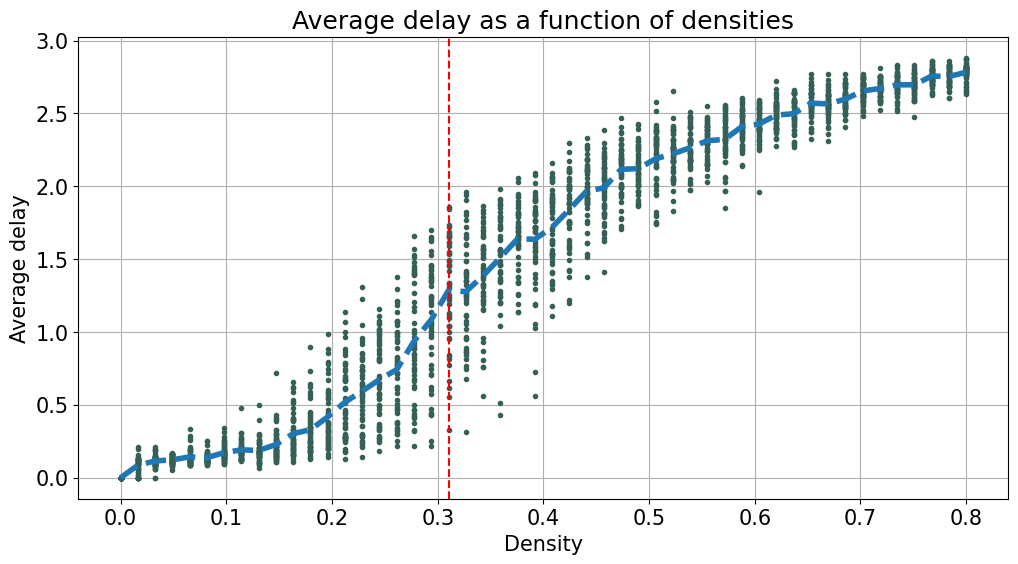

In [32]:
sys.setrecursionlimit(5000000)

p = np.linspace(0, 0.8, 50)    
L = 100
T = int(L / 2)
n = 50 
p_slowdown = 0.1 
v_max = 3

total_delays_per_density = dict() 
average_delays_per_density = dict()  

for density in p:
    lifespan_counter, jam_size_counter, evolutions = modules.run_model_stochastic(density, L, T, n, v_max=v_max, p_slowdown = p_slowdown, return_evolutions=True)
    

    total_delays = [modules.calculate_delay_nasch(evolution,v_max) for evolution in evolutions] 
    average_delays = [delay / float(T) for delay in total_delays]   
    
    total_delays_per_density[density] = total_delays  # n个evolution下的total delay 
    average_delays_per_density[density] = average_delays

# Find critical point: the density for which the total flow average is maximum
mean_total_delays_per_density = {density: np.mean(delays) for density, delays in total_delays_per_density.items()} 
df = pd.DataFrame(list(mean_total_delays_per_density.items()), columns=['Density', 'Average_Delay'])
df = df.sort_values(by='Density') #sort the data via density 
df['Delay_Difference'] = df['Average_Delay'].diff()
max_diff_index = df['Delay_Difference'].abs().idxmax()
max_diff_row = df.iloc[max_diff_index]
#max_diff_row["Density"]
critical_density= max_diff_row["Density"] 
# critical_density = min(mean_total_delays_per_density, key=mean_total_delays_per_density.get)   
print(f"Critical density: {critical_density}")

# plot total flow as a function of densities
plt.figure(figsize=(12,6))
plt.title(f'Average delay as a function of densities',fontsize=18) 
plt.plot(total_delays_per_density.keys(), total_delays_per_density.values(), 'o', markerfacecolor='#356058', markeredgecolor='#356058',markersize=3) 
plt.plot(total_delays_per_density.keys(), [np.mean(delays) for delays in total_delays_per_density.values()], '--',linewidth=4 ) 
# Add a vertical line at the critical density
plt.axvline(x=critical_density, color='red', linestyle='--')
plt.grid(True)
plt.xlabel('Density',fontsize=15)
plt.ylabel('Average delay',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


# Confidence Interval part 

#### critical density dataset 
the dataset is from our github: critical_densities_nasch_n=10_L=200_T=100_#p=30_reps=10.csv

In [33]:
df=pd.read_csv("Results/critical_densities_nasch_n=10_L=200_T=100_#p=30_reps=10.csv")

df 

,p_slowdown,v_max,critical_density
0,0.000000,1,"[0.5517241379310345, 0.48965517241379314, 0.51..."
1,0.034483,1,"[0.510344827586207, 0.46896551724137936, 0.468..."
2,0.068966,1,"[0.510344827586207, 0.5310344827586208, 0.4689..."
3,0.103448,1,"[0.510344827586207, 0.510344827586207, 0.53103..."
4,0.137931,1,"[0.510344827586207, 0.46896551724137936, 0.551..."
...,...,...,...
145,0.862069,5,"[0.2, 0.2, 0.2, 0.22068965517241382, 0.2206896..."
146,0.896552,5,"[0.22068965517241382, 0.2, 0.2, 0.241379310344..."
147,0.931034,5,"[0.2, 0.2, 0.22068965517241382, 0.2, 0.2206896..."
148,0.965517,5,"[0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.241..."


#### data pre-processing 

In [34]:
df['critical_density'] = df['critical_density'].str.replace('[', '').str.replace(']', '')
expanded_cols = df['critical_density'].str.split(',', expand=True) #split the data 
expanded_cols = expanded_cols.apply(pd.to_numeric) # change to numerical form 
num_cols = expanded_cols.shape[1]  #obtain the critical density after spliting 
column_names = ['cd_{}'.format(i) for i in range(1, num_cols + 1)]
expanded_cols.columns = column_names
df = pd.concat([df, expanded_cols], axis=1) # concat the dataframes 
df.drop('critical_density', axis=1, inplace=True)
df['cd_mean'] = df.filter(like='cd_').mean(axis=1)
df['cd_std'] = df.filter(like='cd_').std(axis=1)


####  generate the 95% CI based on certain v_max

max speed =1 

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
0,0.000000,1,0.551724,0.489655,0.510345,0.489655,0.510345,0.510345,0.468966,0.489655,0.510345,0.510345,0.504138,2.079285e-02
1,0.034483,1,0.510345,0.468966,0.468966,0.510345,0.489655,0.510345,0.531034,0.489655,0.510345,0.510345,0.500000,1.907492e-02
2,0.068966,1,0.510345,0.531034,0.468966,0.531034,0.468966,0.510345,0.510345,0.510345,0.489655,0.468966,0.500000,2.313174e-02
3,0.103448,1,0.510345,0.510345,0.531034,0.510345,0.510345,0.489655,0.531034,0.489655,0.489655,0.489655,0.506207,1.548272e-02
4,0.137931,1,0.510345,0.468966,0.551724,0.489655,0.489655,0.510345,0.551724,0.531034,0.489655,0.489655,0.508276,2.689655e-02
5,0.172414,1,0.510345,0.489655,0.468966,0.531034,0.531034,0.510345,0.510345,0.510345,0.489655,0.531034,0.508276,1.951858e-02
6,0.206897,1,0.489655,0.489655,0.510345,0.531034,0.510345,0.510345,0.531034,0.531034,0.531034,0.468966,0.510345,2.068966e-02
7,0.241379,1,0.448276,0.551724,0.489655,0.468966,0.510345,0.468966,0.489655,0.551724,0.531034,0.448276,0.495862,3.706856e-02
8,0.275862,1,0.448276,0.468966,0.489655,0.510345,0.448276,0.531034,0.510345,0.489655,0.510345,0.489655,0.489655,2.617057e-02
9,0.310345,1,0.468966,0.510345,0.489655,0.531034,0.489655,0.510345,0.489655,0.489655,0.489655,0.510345,0.497931,1.655172e-02


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/3811980833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_1['lower'] = df_speed_1['cd_mean'] - 1.96 * df_speed_1['cd_std']
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/3811980833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_1['upper'] = df_speed_1['cd_mean'] + 1.96 * df_speed_1['cd_std']


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=1')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0.1, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.30000000000000004, '0.3'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.5, '0.5'),
  Text(0, 0.6, '0.6'),
  Text(0, 0.7000000000000001, '0.7')])

(0.1, 0.6)

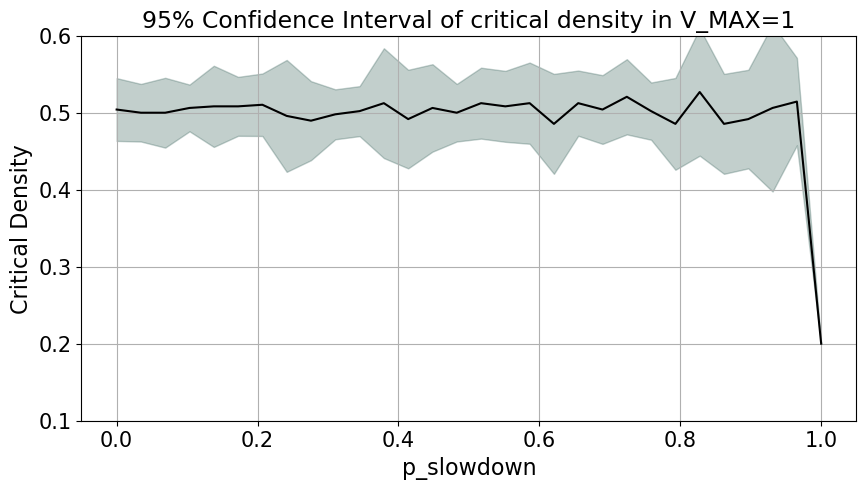

In [35]:
df_speed_1=df[df["v_max"]==1]
df_speed_1 
df_speed_1['lower'] = df_speed_1['cd_mean'] - 1.96 * df_speed_1['cd_std']
df_speed_1['upper'] = df_speed_1['cd_mean'] + 1.96 * df_speed_1['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_1['p_slowdown'], df_speed_1['lower'], df_speed_1['upper'], color='#356058', alpha=0.3)
plt.plot(df_speed_1['p_slowdown'], df_speed_1['cd_mean'], color='black')
plt.xlabel('p_slowdown', fontsize=16)
plt.ylabel('Critical Density', fontsize=16)
plt.title('95% Confidence Interval of critical density in V_MAX=1', fontsize=17) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.ylim(0.1,0.6) 
plt.show()

max speed =2

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
30,0.000000,2,0.344828,0.365517,0.324138,0.344828,0.344828,0.344828,0.365517,0.365517,0.365517,0.365517,0.353103,1.372396e-02
31,0.034483,2,0.344828,0.324138,0.344828,0.365517,0.344828,0.344828,0.324138,0.324138,0.344828,0.344828,0.340690,1.241379e-02
32,0.068966,2,0.344828,0.344828,0.344828,0.344828,0.365517,0.365517,0.344828,0.324138,0.344828,0.303448,0.342759,1.718612e-02
33,0.103448,2,0.344828,0.365517,0.365517,0.365517,0.344828,0.324138,0.365517,0.324138,0.303448,0.344828,0.344828,2.068966e-02
34,0.137931,2,0.344828,0.324138,0.344828,0.344828,0.365517,0.344828,0.324138,0.344828,0.303448,0.324138,0.336552,1.655172e-02
35,0.172414,2,0.303448,0.324138,0.303448,0.324138,0.303448,0.324138,0.344828,0.344828,0.344828,0.365517,0.328276,2.027164e-02
36,0.206897,2,0.303448,0.324138,0.303448,0.365517,0.303448,0.324138,0.365517,0.344828,0.303448,0.303448,0.324138,2.448033e-02
37,0.241379,2,0.303448,0.344828,0.324138,0.324138,0.303448,0.303448,0.344828,0.344828,0.303448,0.303448,0.320000,1.803682e-02
38,0.275862,2,0.324138,0.344828,0.324138,0.324138,0.344828,0.303448,0.324138,0.282759,0.324138,0.303448,0.320000,1.803682e-02
39,0.310345,2,0.324138,0.303448,0.282759,0.303448,0.303448,0.303448,0.324138,0.303448,0.303448,0.344828,0.309655,1.615914e-02


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/4169360171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_2['lower'] = df_speed_2['cd_mean'] - 1.96 * df_speed_2['cd_std']
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/4169360171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_2['upper'] = df_speed_2['cd_mean'] + 1.96 * df_speed_2['cd_std']


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=2')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

(array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 [Text(0, 0.15000000000000002, '0.15'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.35000000000000003, '0.35'),
  Text(0, 0.4, '0.40')])

(0.1, 0.6)

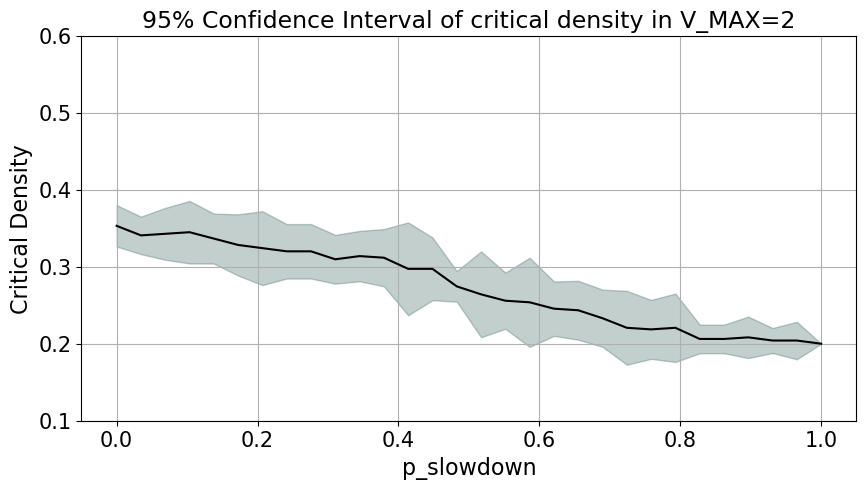

In [36]:
df_speed_2=df[df["v_max"]==2]
df_speed_2 
df_speed_2['lower'] = df_speed_2['cd_mean'] - 1.96 * df_speed_2['cd_std']
df_speed_2['upper'] = df_speed_2['cd_mean'] + 1.96 * df_speed_2['cd_std']
# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_2['p_slowdown'], df_speed_2['lower'], df_speed_2['upper'], color='#356058', alpha=0.3)
plt.plot(df_speed_2['p_slowdown'], df_speed_2['cd_mean'], color='black')
plt.xlabel('p_slowdown', fontsize=16)
plt.ylabel('Critical Density', fontsize=16)
plt.title('95% Confidence Interval of critical density in V_MAX=2', fontsize=17) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.ylim(0.1,0.6)  
plt.show()

max speed=3 

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
60,0.000000,3,0.262069,0.303448,0.282759,0.262069,0.282759,0.262069,0.262069,0.303448,0.282759,0.303448,0.280690,1.718612e-02
61,0.034483,3,0.282759,0.303448,0.262069,0.262069,0.262069,0.241379,0.241379,0.282759,0.282759,0.282759,0.270345,1.896238e-02
62,0.068966,3,0.282759,0.241379,0.282759,0.241379,0.262069,0.303448,0.282759,0.262069,0.262069,0.262069,0.268276,1.862069e-02
63,0.103448,3,0.241379,0.282759,0.262069,0.241379,0.262069,0.282759,0.262069,0.262069,0.282759,0.241379,0.262069,1.602614e-02
64,0.137931,3,0.262069,0.262069,0.220690,0.262069,0.262069,0.262069,0.200000,0.262069,0.241379,0.220690,0.245517,2.228344e-02
65,0.172414,3,0.220690,0.262069,0.241379,0.262069,0.262069,0.262069,0.241379,0.262069,0.241379,0.241379,0.249655,1.372396e-02
66,0.206897,3,0.262069,0.262069,0.200000,0.220690,0.241379,0.262069,0.220690,0.262069,0.220690,0.241379,0.239310,2.160063e-02
67,0.241379,3,0.241379,0.220690,0.241379,0.241379,0.241379,0.241379,0.262069,0.262069,0.241379,0.262069,0.245517,1.241379e-02
68,0.275862,3,0.241379,0.220690,0.200000,0.241379,0.241379,0.282759,0.220690,0.220690,0.220690,0.220690,0.231034,2.120059e-02
69,0.310345,3,0.220690,0.220690,0.241379,0.220690,0.241379,0.241379,0.220690,0.241379,0.241379,0.200000,0.228966,1.372396e-02


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/4228473283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_3['lower'] = df_speed_3['cd_mean'] - 1.96 * df_speed_3['cd_std']
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/4228473283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_3['upper'] = df_speed_3['cd_mean'] + 1.96 * df_speed_3['cd_std']


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=3')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

(array([0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34]),
 [Text(0, 0.16, '0.16'),
  Text(0, 0.18, '0.18'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.22, '0.22'),
  Text(0, 0.24, '0.24'),
  Text(0, 0.26, '0.26'),
  Text(0, 0.28, '0.28'),
  Text(0, 0.30000000000000004, '0.30'),
  Text(0, 0.32, '0.32'),
  Text(0, 0.33999999999999997, '0.34')])

(0.1, 0.6)

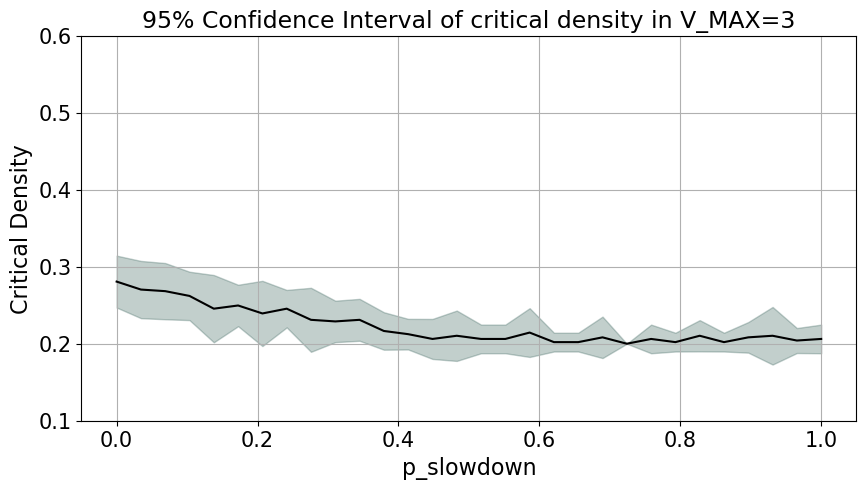

In [37]:
df_speed_3=df[df["v_max"]==3]
df_speed_3 
df_speed_3['lower'] = df_speed_3['cd_mean'] - 1.96 * df_speed_3['cd_std']
df_speed_3['upper'] = df_speed_3['cd_mean'] + 1.96 * df_speed_3['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_3['p_slowdown'], df_speed_3['lower'], df_speed_3['upper'], color='#356058', alpha=0.3)
plt.plot(df_speed_3['p_slowdown'], df_speed_3['cd_mean'], color='black')
plt.xlabel('p_slowdown', fontsize=16)
plt.ylabel('Critical Density', fontsize=16)
plt.title('95% Confidence Interval of critical density in V_MAX=3', fontsize=17)  
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.ylim(0.1,0.6)
plt.show()

max speed=4 

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
90,0.000000,4,0.241379,0.241379,0.200000,0.241379,0.220690,0.220690,0.220690,0.20000,0.220690,0.241379,0.224828,1.548272e-02
91,0.034483,4,0.220690,0.220690,0.262069,0.241379,0.220690,0.200000,0.241379,0.22069,0.200000,0.200000,0.222759,1.951858e-02
92,0.068966,4,0.220690,0.241379,0.200000,0.241379,0.262069,0.200000,0.200000,0.22069,0.200000,0.200000,0.218621,2.160063e-02
93,0.103448,4,0.200000,0.220690,0.220690,0.220690,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.208276,1.013582e-02
94,0.137931,4,0.241379,0.200000,0.220690,0.200000,0.220690,0.241379,0.200000,0.20000,0.220690,0.241379,0.218621,1.718612e-02
95,0.172414,4,0.200000,0.220690,0.241379,0.200000,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.208276,1.372396e-02
96,0.206897,4,0.200000,0.220690,0.220690,0.200000,0.200000,0.200000,0.200000,0.22069,0.200000,0.200000,0.206207,9.481191e-03
97,0.241379,4,0.200000,0.200000,0.200000,0.200000,0.220690,0.200000,0.200000,0.22069,0.200000,0.200000,0.204138,8.275862e-03
98,0.275862,4,0.200000,0.220690,0.220690,0.220690,0.200000,0.220690,0.200000,0.22069,0.200000,0.200000,0.210345,1.034483e-02
99,0.310345,4,0.200000,0.200000,0.200000,0.200000,0.220690,0.220690,0.200000,0.22069,0.200000,0.200000,0.206207,9.481191e-03


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/764527407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_4['lower'] = df_speed_4['cd_mean'] - 1.96 * df_speed_4['cd_std']
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/764527407.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_4['upper'] = df_speed_4['cd_mean'] + 1.96 * df_speed_4['cd_std']


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=4')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

(array([0.16, 0.18, 0.2 , 0.22, 0.24, 0.26, 0.28]),
 [Text(0, 0.16, '0.16'),
  Text(0, 0.18, '0.18'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.22, '0.22'),
  Text(0, 0.24, '0.24'),
  Text(0, 0.26, '0.26'),
  Text(0, 0.28, '0.28')])

(0.1, 0.6)

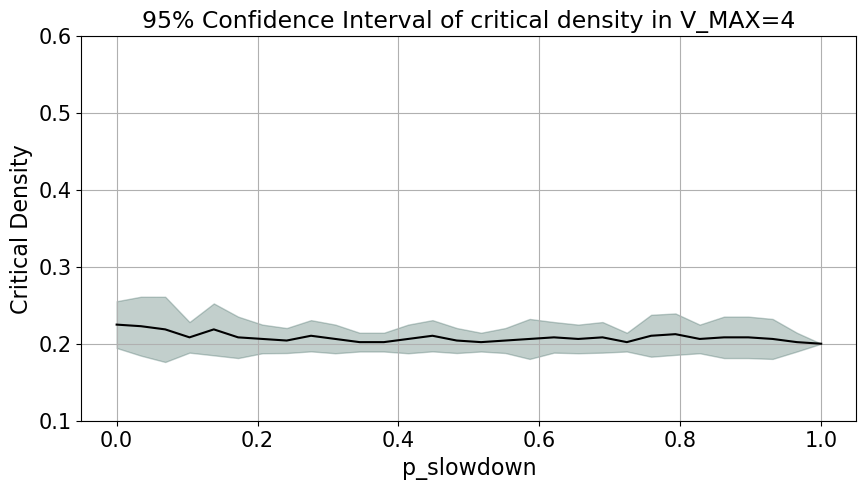

In [38]:
df_speed_4=df[df["v_max"]==4]
df_speed_4 
df_speed_4['lower'] = df_speed_4['cd_mean'] - 1.96 * df_speed_4['cd_std']
df_speed_4['upper'] = df_speed_4['cd_mean'] + 1.96 * df_speed_4['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_4['p_slowdown'], df_speed_4['lower'], df_speed_4['upper'], color='#356058', alpha=0.3)
plt.plot(df_speed_4['p_slowdown'], df_speed_4['cd_mean'], color='black')
plt.xlabel('p_slowdown', fontsize=16)
plt.ylabel('Critical Density', fontsize=16)
plt.title('95% Confidence Interval of critical density in V_MAX=4', fontsize=17) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.ylim(0.1,0.6)
plt.show()


max speed = 5 

,p_slowdown,v_max,cd_1,cd_2,cd_3,cd_4,cd_5,cd_6,cd_7,cd_8,cd_9,cd_10,cd_mean,cd_std
120,0.000000,5,0.20000,0.20000,0.200000,0.220690,0.200000,0.22069,0.220690,0.200000,0.220690,0.200000,0.208276,1.013582e-02
121,0.034483,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.202069,6.206897e-03
122,0.068966,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,2.775558e-17
123,0.103448,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.200000,2.775558e-17
124,0.137931,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.220690,0.202069,6.206897e-03
125,0.172414,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.200000,0.202069,6.206897e-03
126,0.206897,5,0.22069,0.20000,0.220690,0.220690,0.220690,0.20000,0.200000,0.200000,0.200000,0.241379,0.212414,1.372396e-02
127,0.241379,5,0.20000,0.20000,0.200000,0.200000,0.200000,0.20000,0.200000,0.200000,0.200000,0.241379,0.204138,1.241379e-02
128,0.275862,5,0.20000,0.22069,0.200000,0.200000,0.200000,0.20000,0.200000,0.220690,0.200000,0.200000,0.204138,8.275862e-03
129,0.310345,5,0.20000,0.20000,0.220690,0.200000,0.200000,0.20000,0.200000,0.220690,0.200000,0.220690,0.206207,9.481191e-03


/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/3115308315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_5['lower'] = df_speed_5['cd_mean'] - 1.96 * df_speed_5['cd_std']
/var/folders/f8/8_w9799j2wlfkyxvlcmd3z180000gn/T/ipykernel_66622/3115308315.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_speed_5['upper'] = df_speed_5['cd_mean'] + 1.96 * df_speed_5['cd_std']


<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'p_slowdown')

Text(0, 0.5, 'Critical Density')

Text(0.5, 1.0, '95% Confidence Interval of critical density in V_MAX=5')

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(-0.2, 0, '−0.2'),
  Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4000000000000001, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0000000000000002, 0, '1.0'),
  Text(1.2000000000000002, 0, '1.2')])

(array([0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25]),
 [Text(0, 0.17, '0.17'),
  Text(0, 0.18000000000000002, '0.18'),
  Text(0, 0.19, '0.19'),
  Text(0, 0.2, '0.20'),
  Text(0, 0.21000000000000002, '0.21'),
  Text(0, 0.22000000000000003, '0.22'),
  Text(0, 0.23, '0.23'),
  Text(0, 0.24000000000000002, '0.24'),
  Text(0, 0.25, '0.25')])

(0.1, 0.6)

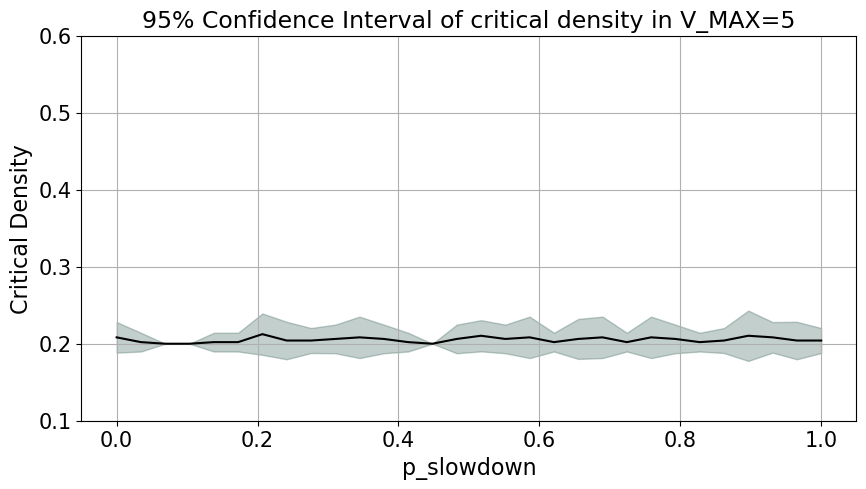

In [39]:
df_speed_5=df[df["v_max"]==5]
df_speed_5 
df_speed_5['lower'] = df_speed_5['cd_mean'] - 1.96 * df_speed_5['cd_std']
df_speed_5['upper'] = df_speed_5['cd_mean'] + 1.96 * df_speed_5['cd_std']

# Plot the data
plt.figure(figsize=(10, 5))
plt.fill_between(df_speed_5['p_slowdown'], df_speed_5['lower'], df_speed_5['upper'], color='#356058', alpha=0.3)
plt.plot(df_speed_5['p_slowdown'], df_speed_5['cd_mean'], color='black')
plt.xlabel('p_slowdown', fontsize=16)
plt.ylabel('Critical Density', fontsize=16)
plt.title('95% Confidence Interval of critical density in V_MAX=5', fontsize=17) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.ylim(0.1,0.6)
plt.show()


## NaSch animation

#### simulate the NaSch model and the typical 184 

In [40]:
def Plot_Space():
    # Draw the dividing line for each cell
    for i in range(1, numofcell):
        plt.plot([i-0.5, i-0.5], [-0.5, 0.5], '-k', linewidth=0.5)
    
    plt.axis([-0.5, numofcell-0.5, -0.5, 0.5])
    plt.xticks([])
    plt.yticks([])


def get_empty_front(link, numofcell, indexofcell):
    
    """
     function: Get the distance from the car in front
     
     param link: vehicle location information
     param numofcell: humber of cells 
     param indexofcell: index location of the current vehicle
     return: the number of empty cells between the current vehicle and the car in front of it
     
   """
    
    link2 = link * 2
    num = 0  
    i = 1  

    # Loop until a non-empty cell is found
    while link2[indexofcell + i] is None:
        num += 1
        i += 1

    return num

In [43]:
%matplotlib notebook 

# randomalize 
numofcell = 20     # length of road (circle)
numofcar = 10        # number of cars 
max_time = 100     # timestep 
max_speed = 3      # v_max 
p_slowdown = 0.1   # p_slowdown 
pause_time = 0.1   # refresh time  
cell_size = 15     # size of cell (how big it is)

# randomlize 
link = [None] * numofcell
num = 0
while num != numofcar:
    sj = random.randint(0, numofcell - 1)
    if link[sj] is None:
        link[sj] = random.randint(0, max_speed)
        num += 1

# update the function 
def update(frame):
    global link
    for cell in range(numofcell):
        if link[cell] is not None:
            # acceleration 
            link[cell] = min(link[cell] + 1, max_speed)
            # braking 
            link[cell] = min(link[cell], get_empty_front(link, numofcell, cell))
            # slow down 
            if random.random() <= p_slowdown:
                link[cell] = max(link[cell] - 1, 0)
    # update the place 
    nlink = [None] * numofcell
    for cell in range(numofcell):
        if link[cell] is not None:
            new_index = cell + link[cell]
            if new_index >= numofcell:
                new_index -= numofcell
            nlink[new_index] = link[cell]
    link = nlink

    x1 = [i for i in range(len(link)) if link[i] is not None]
    ax.clear()
    Plot_Space()
    ax.plot(x1, [0] * len(x1), 'sk', markersize=cell_size)
    #ax.set_xlabel('timestep: ' + str(frame))
    ax.set_xlabel(f'timestep: {frame}, p_slowdown: {p_slowdown}, v_max: {max_speed}, density: {numofcar/numofcell}')


fig, ax = plt.subplots(figsize=(10, 1))
ani = animation.FuncAnimation(fig, update, frames=max_time, repeat=True)
plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

/Users/jennadevries/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
